In [35]:
import random
import bittensor as bt
subtensor = bt.subtensor(network="archive")
current_block = subtensor.block
uid = random.randint(1,256) # TODO your UID
top_uid = uid + 1 # TODO a UID to compare to

In [36]:
weights = []
incentives = []
# get the last several days of metagraph data
for blk in range(current_block - (7200*7), current_block - (7200*6), 450):
    while True:
        try: 
            mg = subtensor.metagraph(netuid=20, lite=False, block=blk)
            break
        except Exception as e:
            print(e)
    weights.append(mg.W[(mg.S > 20000) & mg.validator_permit, uid])  
    incentives.append(mg.I[uid])  

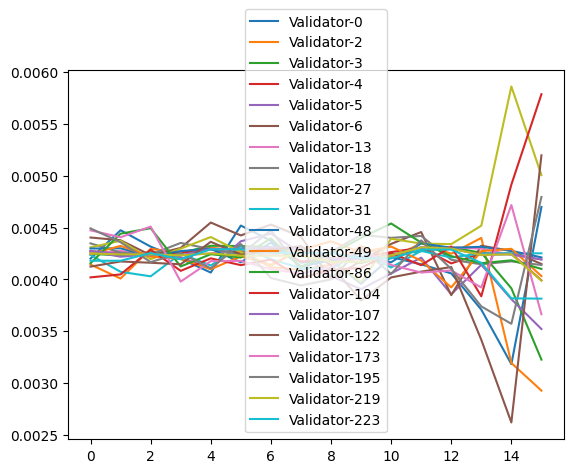

In [37]:
import numpy as np
import matplotlib.pyplot as plt
vali_uids = mg.uids[(mg.S > 20000) & mg.validator_permit]
weightsT = np.transpose(weights)
for i,line in enumerate(weightsT):
    plt.plot(line, label=f"Validator-{vali_uids[i]}")
plt.legend()

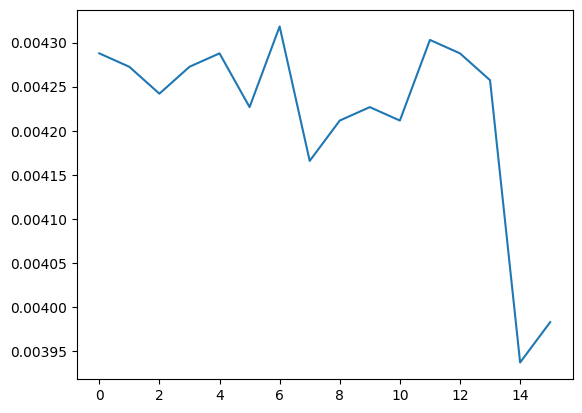

In [38]:
plt.plot(incentives)

In [58]:
import wandb
import pandas as pd
pd.set_option('display.width', 1000)
api = wandb.Api(timeout=360)
# change to mainnet instead of testnet
runs = api.runs('bitagentsn20/mainnet', filters={"display_name": {"$regex": ".*-35.*"}}) # change to "-<spec version>" for latest 

In [60]:
while True:
    # sometimes ends prematurely and errors
    try:
        hist = runs.histories()
        df = pd.DataFrame(hist)
        break
    except:
        pass

In [69]:
scores = df[df['miner_uid']==uid][['_timestamp','normalized_score']].values.T

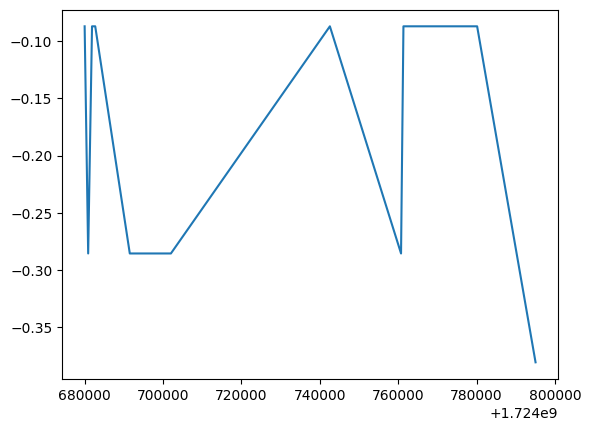

In [70]:
x,y = scores
ordered_idxs = x.argsort()
plt.plot(x[ordered_idxs],y[ordered_idxs])

In [71]:
[y.min(), y.max(), y.mean(), np.median(y)]

[np.float64(-0.38095238095238093),
 np.float64(-0.08695652173913043),
 np.float64(-0.1595583160800552),
 np.float64(-0.08695652173913043)]

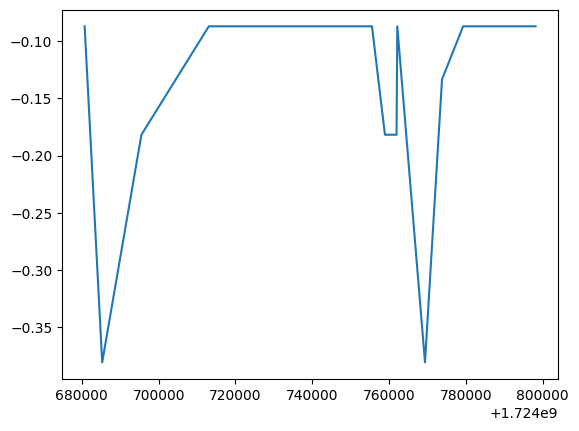

In [74]:
scores = df[df['miner_uid']==top_uid][['_timestamp','normalized_score']].values.T
x,y = scores
ordered_idxs = x.argsort()
plt.plot(x[ordered_idxs],y[ordered_idxs])

In [75]:
[y.min(), y.max(), y.mean(), np.median(y)]

[np.float64(-0.38095238095238093),
 np.float64(-0.08695652173913043),
 np.float64(-0.141012610577828),
 np.float64(-0.08695652173913043)]

In [76]:
average_normalized_score = df.groupby('miner_uid').agg(
    normalized_score_mean=('normalized_score', 'mean'),
    sample_count=('normalized_score', 'size')
).reset_index()

# Display the result
print(average_normalized_score)

     miner_uid  normalized_score_mean  sample_count
0            1              -0.115290            12
1            2              -0.124734             9
2            3              -0.145399            15
3            4              -0.159558            15
4            5              -0.141013            17
..         ...                    ...           ...
117        129              -0.093140            15
118        130              -0.107956            14
119        131              -0.178172            14
120        132              -0.206211             5
121        133              -0.179526             9

[122 rows x 3 columns]


In [77]:
average_normalized_score["sample_count"].mean()

np.float64(12.295081967213115)

In [78]:
average_normalized_score[average_normalized_score["miner_uid"]==uid]["sample_count"]

Series([], Name: sample_count, dtype: int64)

In [79]:
average_normalized_score[average_normalized_score["miner_uid"]==top_uid]["sample_count"]

Series([], Name: sample_count, dtype: int64)

In [80]:
average_normalized_score["normalized_score_mean"].mean()

np.float64(-0.14607905953190578)

In [81]:
average_normalized_score["normalized_score_mean"].median()

np.float64(-0.1476629650542694)

In [82]:
average_normalized_score[average_normalized_score["miner_uid"]==uid]["normalized_score_mean"]

Series([], Name: normalized_score_mean, dtype: float64)

In [83]:
average_normalized_score[average_normalized_score["miner_uid"]==top_uid]["normalized_score_mean"]

Series([], Name: normalized_score_mean, dtype: float64)

In [85]:
average_normalized_score[average_normalized_score["normalized_score_mean"]<=average_normalized_score[average_normalized_score["miner_uid"]==uid]["normalized_score_mean"].values[0]]

,miner_uid,normalized_score_mean,sample_count
3,4,-0.159558,15
9,11,-0.179301,16
10,12,-0.191831,15
18,20,-0.185566,14
19,22,-0.234148,13
25,29,-0.285714,1
27,31,-0.170091,13
28,32,-0.285714,1
31,35,-0.167913,20
39,43,-0.162048,15


In [86]:
len(average_normalized_score[average_normalized_score["normalized_score_mean"]<=average_normalized_score[average_normalized_score["miner_uid"]==uid]["normalized_score_mean"].values[0]])

45

In [87]:
df[(df["miner_uid"]==uid)&(df["normalized_score"]<0.6)][["messages", "prompt", "tools", "files", "datas", "response", "results", "normalized_score"]] 

,messages,prompt,tools,files,datas,response,results,normalized_score
7,What is the highest value of Output?,,[],NaN,NaN,None,[bold blue]Does not error[/bold blue]\n:cross_...,-0.086957
23,What is the location for in-person volunteerin...,,[{'description': 'Searches for in-person volun...,NaN,NaN,None,[bold blue]Does not error[/bold blue]\n:cross_...,-0.285714
33,What is the difference between the high and lo...,,[],NaN,NaN,None,[bold blue]Does not error[/bold blue]\n:cross_...,-0.086957
42,What is the difference between the high and lo...,,[],NaN,NaN,None,[bold blue]Does not error[/bold blue]\n:cross_...,-0.086957
138,Shall I proceed with setting up the monthly el...,,[{'description': 'Schedules a monthly payment ...,NaN,NaN,None,[bold blue]Does not error[/bold blue]\n:cross_...,-0.285714
250,"What are some quick, easy, and low-carb vegan ...",,"[{'arguments': None, 'description': 'Get a qui...",NaN,NaN,None,[bold blue]Does not error[/bold blue]\n:cross_...,-0.285714
707,On what date are Productivity and Strength clo...,,[],"[{'type': 'image', 'content': 'iVBORw0KGgoAAAA...",[],None,[bold blue]Does not error[/bold blue]\n:cross_...,-0.086957
928,"How can we provide the necessary parameters, ""...",,"[{'name': 'predict_pump_failure_date', 'argume...",[],[],None,[bold blue]Does not error[/bold blue]\n:cross_...,-0.285714
938,What is the difference between the high and lo...,,[],"[{'type': 'image', 'content': 'iVBORw0KGgoAAAA...",[],None,[bold blue]Does not error[/bold blue]\n:cross_...,-0.086957
1047,[{'content': 'What is the lowest value of Effi...,,[],[{'content': 'iVBORw0KGgoAAAANSUhEUgAABD8AAAGG...,[],None,[bold blue]Does not error[/bold blue]\n:cross_...,-0.086957


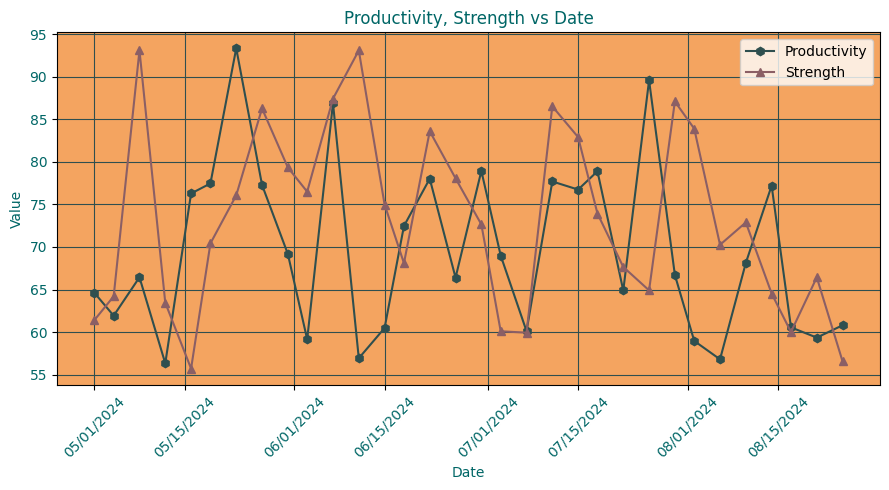

In [90]:
# the iloc should be one of the rows with files in it
img_str = df[(df["miner_uid"]==uid)&(df["normalized_score"]<0.6)].iloc[6]["files"][0]['content']
from PIL import Image
from io import BytesIO
import base64

Image.open(BytesIO(base64.b64decode(img_str)))